<a href="https://colab.research.google.com/github/ThanhToan2002/BT/blob/main/NhanDienDoAnVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training=train_data.flow_from_directory('/content/drive/MyDrive/DoanVN/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1500 images belonging to 5 classes.


In [4]:
training.class_indices

{'Banh xeo': 0, 'Bun dau mam tom': 1, 'Ca kho to': 2, 'Com tam': 3, 'Pho': 4}

In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
train=model.fit(training,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
47/47 [==============================] - 675s 14s/step - loss: 1.4479 - accuracy: 0.3860
Epoch 2/20
47/47 [==============================] - 132s 3s/step - loss: 0.9228 - accuracy: 0.6467
Epoch 3/20
47/47 [==============================] - 137s 3s/step - loss: 0.7548 - accuracy: 0.7287
Epoch 4/20
47/47 [==============================] - 130s 3s/step - loss: 0.6626 - accuracy: 0.7647
Epoch 5/20
47/47 [==============================] - 134s 3s/step - loss: 0.5730 - accuracy: 0.7913
Epoch 6/20
47/47 [==============================] - 132s 3s/step - loss: 0.4878 - accuracy: 0.8300
Epoch 7/20
47/47 [==============================] - 132s 3s/step - loss: 0.3776 - accuracy: 0.8613
Epoch 8/20
47/47 [==============================] - 138s 3s/step - loss: 0.3909 - accuracy: 0.8647
Epoch 9/20
47/47 [==============================] - 133s 3s/step - loss: 0.3395 - accuracy: 0.8833
Epoch 10/20
47/47 [==============================] - 132s 3s/step - loss: 0.2533 - accuracy: 0.9147
Epoch 11

In [7]:
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])Score=model.evaluate(training,verbose=0)


Train Loss 0.07927914708852768
Train Accuracy 0.9739999771118164


In [8]:
model.save("nhandiendoan(cnn).ipynb")

In [9]:
model_1=load_model('nhandiendoan(cnn).ipynb')

In [10]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
import matplotlib.pyplot as plt 

1/1 [==============================] - 0s 48ms/step
Banh xeo


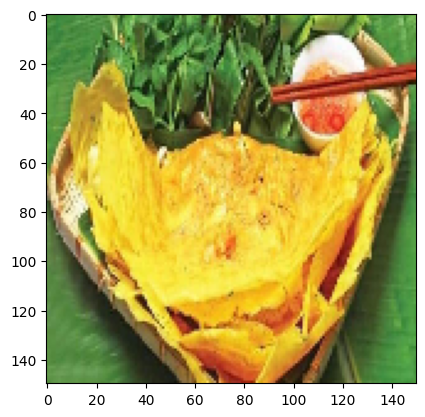

1/1 [==============================] - 0s 45ms/step
Banh xeo


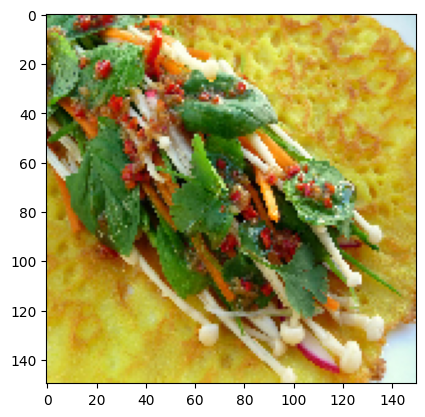

1/1 [==============================] - 0s 68ms/step
Bun dau mam tom


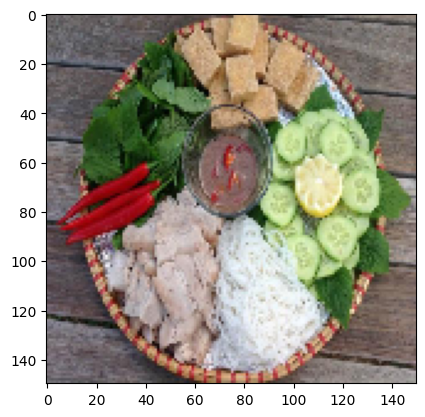

1/1 [==============================] - 0s 44ms/step
Bun dau mam tom


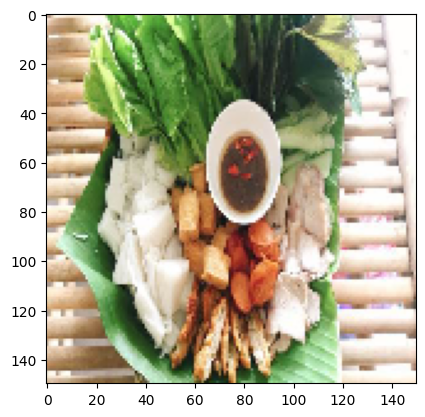

1/1 [==============================] - 0s 45ms/step
Com tam


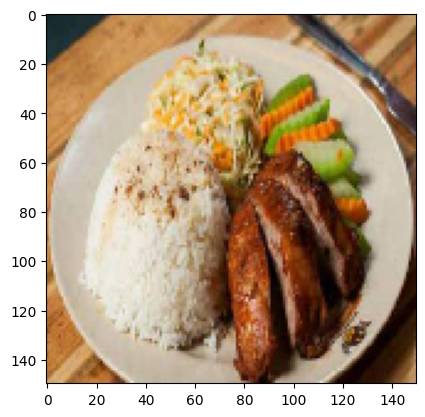

1/1 [==============================] - 0s 47ms/step
Com tam


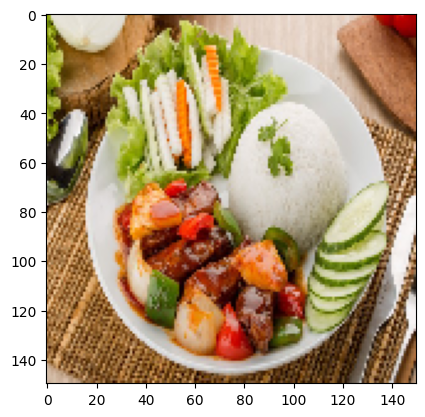

1/1 [==============================] - 0s 52ms/step
Pho


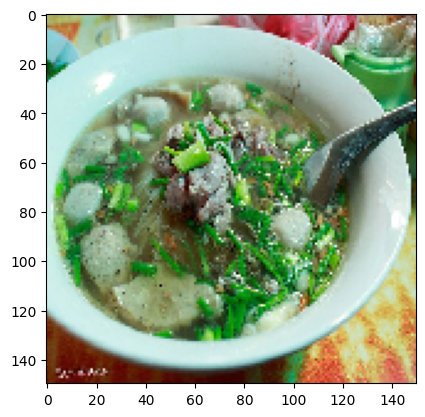

1/1 [==============================] - 0s 48ms/step
Pho


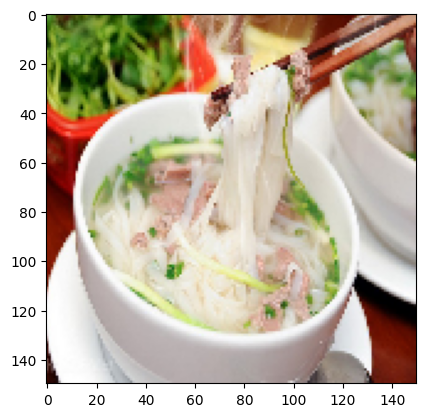

1/1 [==============================] - 0s 42ms/step
Ca kho to


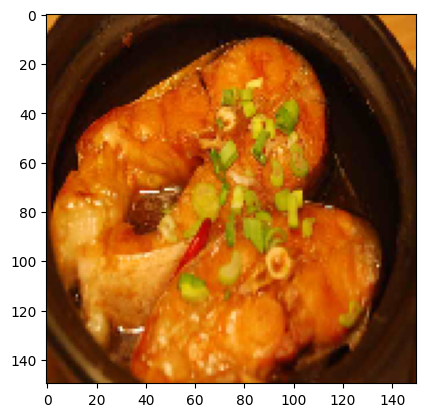

1/1 [==============================] - 0s 44ms/step
Ca kho to


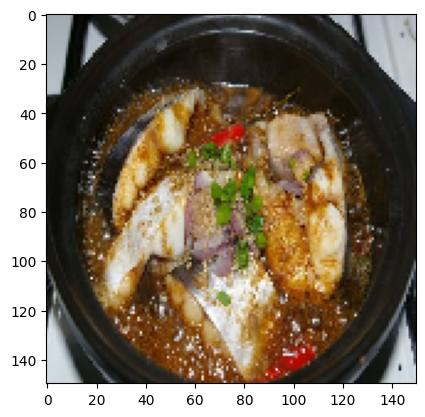

In [12]:
test='/content/drive/MyDrive/DoanVN/Test'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Banh xeo','Bun dau mam tom','Ca kho to','Com tam','Pho']
  print(class_name[result]) 
  plt.show()